## <font color = blue> *BIKE SHARING ASSIGNMENT* </font>

#### <font color = green> *Submitted by - Yoshita Dhanwaria*</font>

##### BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.In order to accelerate its revenue,the company wants to know:
##### 1. Which variables are significant in predicting the demand for shared bikes.
##### 2. How well those variables describe the bike demands


In [1]:
# importing the required packages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as ch
import datetime
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import pylab
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from scipy.stats import pearsonr

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows',None)

In [3]:
# reading the dataset
bike_df = pd.read_csv('day.csv')

In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking fir missing values in data
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### - There is no missing value in the data set
###### - dteday is having Dtype as "object" instead of "date", we will have to change the data type for the same
###### - For encoded variables - "season" / "weathersit" / "weekday"/"yr"/"holiday"/"workingday"/"weekday"/"mnth" , I'll decode with actual values for better insights from EDA

In [7]:
# changing the datatype for dteday column
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],format= "%d-%m-%Y")

#### Creating categorical variables for "season" / "weathersit" / "weekday"/"yr"/"holiday"/"workingday"/"weekday"/"mnth"

In [8]:
season_value = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_df['season'] = bike_df['season'].map(season_value)
print(bike_df['season'].dtype)
print('-'*20)
print(bike_df['season'].value_counts())

object
--------------------
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [9]:
weathersit_value = {1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'}
bike_df['weathersit']=bike_df['weathersit'].map(weathersit_value)
print(bike_df['weathersit'].dtype)
print('-'*20)
print(bike_df['weathersit'].value_counts())

object
--------------------
weathersit
Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: count, dtype: int64


In [10]:
year_value = {0:'2018',1:'2019'}
bike_df['yr'] = bike_df['yr'].map(year_value)
print(bike_df['yr'].dtype)
print('-'*20)
print(bike_df['yr'].value_counts())

object
--------------------
yr
2018    365
2019    365
Name: count, dtype: int64


In [11]:
holiday_value = {0:"Not a Holiday",1:"Holiday"}
bike_df['holiday'] = bike_df['holiday'].map(holiday_value)
print(bike_df['holiday'].dtype)
print('-'*20)
print(bike_df['holiday'].value_counts())

object
--------------------
holiday
Not a Holiday    709
Holiday           21
Name: count, dtype: int64


In [12]:
workingday_value = {0 : "Non Working day",1 : "Working day"}
bike_df['workingday'] = bike_df['workingday'].map(workingday_value)
print(bike_df['workingday'].dtype)
print('-'*20)
print(bike_df['workingday'].value_counts())

object
--------------------
workingday
Working day        499
Non Working day    231
Name: count, dtype: int64


In [13]:
print(bike_df['workingday'].value_counts())

workingday
Working day        499
Non Working day    231
Name: count, dtype: int64


In [14]:
weekday_value = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
bike_df['weekday']=bike_df['weekday'].map(weekday_value)
print(bike_df['weekday'].dtype)
print('-'*20)
print(bike_df['weekday'].value_counts())

object
--------------------
weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64


In [15]:
mnth_value= {1 : "January",2 : "February",3 : "March",4 : "April",5 : "May",6 : "June",7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}
bike_df['mnth'] = bike_df['mnth'].map(mnth_value)
print(bike_df['mnth'].dtype)
print('-'*20)
print(bike_df['mnth'].value_counts())

object
--------------------
mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64


In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
numeric_list=bike_df.select_dtypes(include=["number"]).columns.tolist()

In [20]:
bike_df[numeric_list].describe()

,instant,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [21]:
pd.pivot_table(bike_df, index = 'holiday' , values ='cnt' , aggfunc = 'count').apply(lambda x:x/x.sum()*100,axis=0)

,cnt
holiday,
Holiday,2.876712
Not a Holiday,97.123288


In [22]:
char_list = bike_df.select_dtypes(include = ['object']).columns.tolist()

In [23]:
for i in char_list:
    print("Variable distribution of",i)
    print(pd.pivot_table(bike_df, index = i , values ='cnt' , aggfunc = 'count').apply(lambda x:x/x.sum()*100,axis=0))
    print('-'*20)

Variable distribution of season
              cnt
season           
fall    25.753425
spring  24.657534
summer  25.205479
winter  24.383562
--------------------
Variable distribution of yr
       cnt
yr        
2018  50.0
2019  50.0
--------------------
Variable distribution of mnth
                cnt
mnth               
April      8.219178
August     8.493151
December   8.493151
February   7.671233
January    8.493151
July       8.493151
June       8.219178
March      8.493151
May        8.493151
November   8.219178
October    8.493151
September  8.219178
--------------------
Variable distribution of holiday
                     cnt
holiday                 
Holiday         2.876712
Not a Holiday  97.123288
--------------------
Variable distribution of weekday
                 cnt
weekday             
Friday     14.246575
Monday     14.383562
Saturday   14.383562
Sunday     14.383562
Thursday   14.246575
Tuesday    14.246575
Wednesday  14.109589
--------------------
Variable distribut

##### ~ 68% of people are using bike on working day 
##### Only ~3% of people are using bike on holiday 
##### ~63% of people are using bike on Clear, Few clouds, Partly cloudy, Partly cloudy day

In [24]:
# seeing the distribution of dependent variable - cnt with month and year , cnt with weathersit

In [25]:
bike_df['mon_yr'] = bike_df['dteday'].dt.strftime('%b-%Y')

In [26]:
bike_df['mon_yr'].nunique()

24

In [27]:
bike_df['mon_yr'].value_counts()

mon_yr
Jan-2018    31
Oct-2018    31
Oct-2019    31
Aug-2019    31
Jul-2019    31
May-2019    31
Mar-2019    31
Dec-2018    31
Jan-2019    31
Aug-2018    31
Jul-2018    31
May-2018    31
Mar-2018    31
Dec-2019    31
Sep-2018    30
Nov-2018    30
Apr-2019    30
Jun-2018    30
Jun-2019    30
Apr-2018    30
Sep-2019    30
Nov-2019    30
Feb-2018    28
Feb-2019    28
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Bike demand')

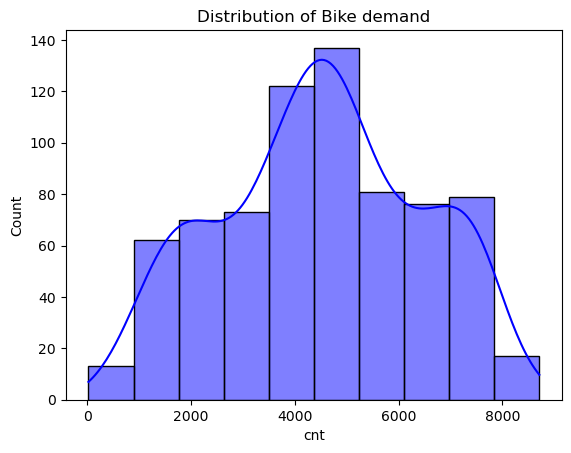

In [28]:
sns.histplot(bike_df['cnt'], kde=True, bins=10, color='blue')
plt.title('Distribution of Bike demand')

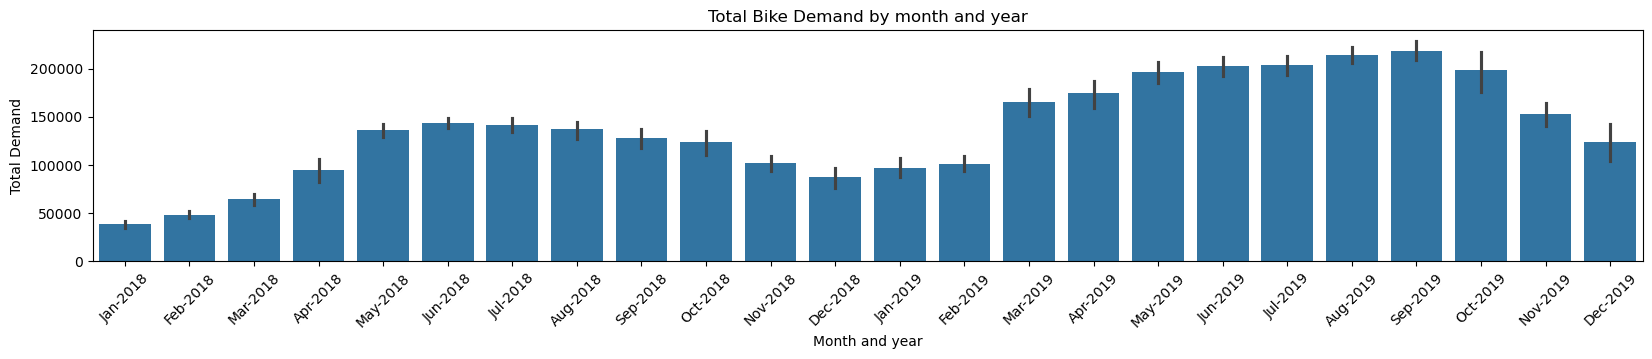

In [29]:
plt.figure(figsize=(20, 3))
sns.barplot(x='mon_yr', y='cnt', data=bike_df,estimator='sum')
plt.title('Total Bike Demand by month and year')
plt.xlabel('Month and year')
plt.ylabel('Total Demand')
plt.xticks(rotation=45) 
plt.show()

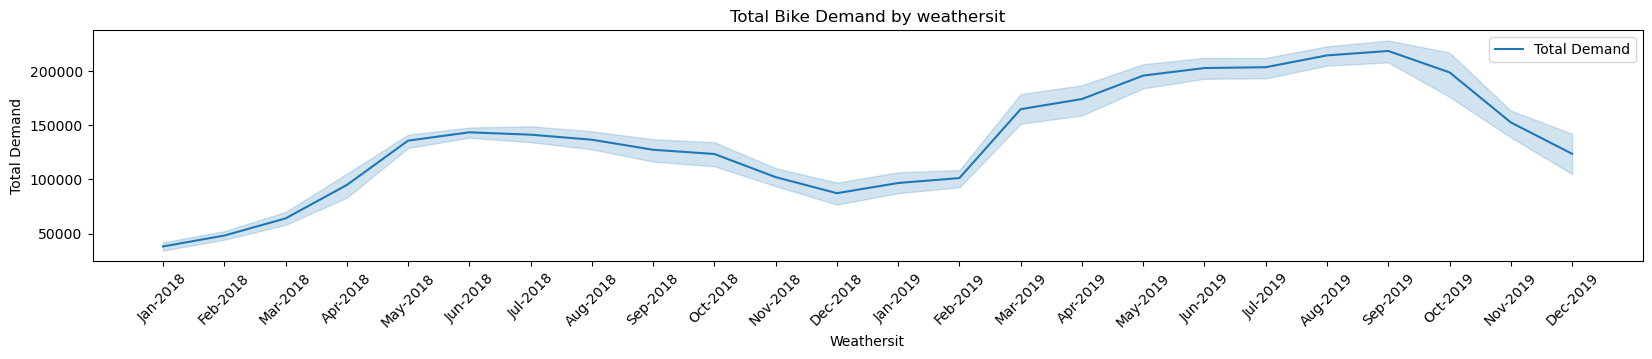

In [30]:
plt.figure(figsize=(20,3))
sns.lineplot(x='mon_yr',y='cnt',data=bike_df ,estimator='sum',label='Total Demand')
plt.title('Total Bike Demand by weathersit')
plt.xlabel('Weathersit')
plt.ylabel('Total Demand')
plt.xticks(rotation=45) 
plt.show()

Except for seasonal dip towards the end of the year, we see a clear increasing trend. This is most likely because of increasing popularity with time

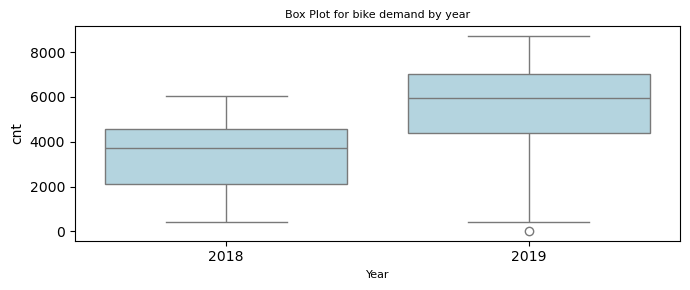

In [31]:
# Year and total demand 

plt.figure(figsize=(7, 3))
sns.boxplot(x="yr", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by year',fontsize=8)
plt.xlabel('Year',fontsize=8)
plt.tight_layout()
plt.show()


 The boxplot by years reinforces our hypothesis

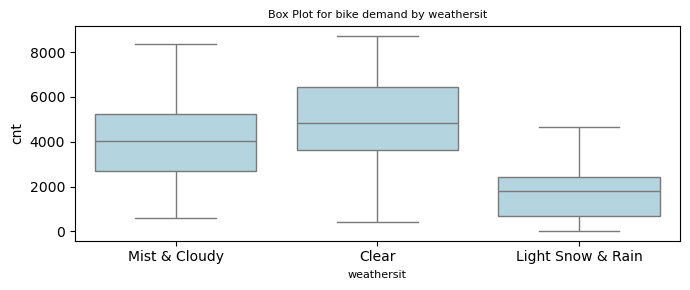

In [32]:
# weathersit and total demand 

plt.figure(figsize=(7, 3))
sns.boxplot(x="weathersit", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by weathersit',fontsize=8)
plt.xlabel('weathersit',fontsize=8)
plt.tight_layout()
plt.show()

##### Clearly, the most favourable weather for Shared Bike rentals is Clear / Less Cloudy, while the adverse weather condition like Light Rain/Thunderstorms see less people using shared bikes

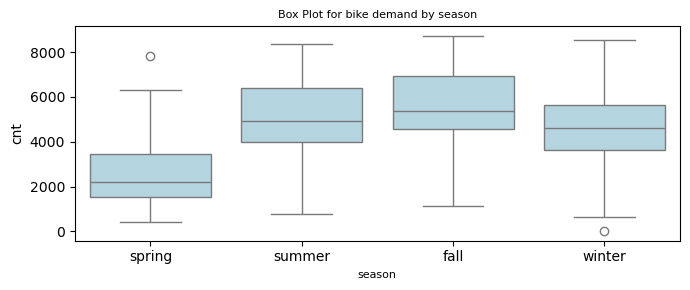

In [33]:
# season and total demand 

plt.figure(figsize=(7, 3))
sns.boxplot(x="season", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by season',fontsize=8)
plt.xlabel('season',fontsize=8)
plt.tight_layout()
plt.show()

##### Fall season sees the maximum bike rentals followed by summer with spring seeing the least rentals

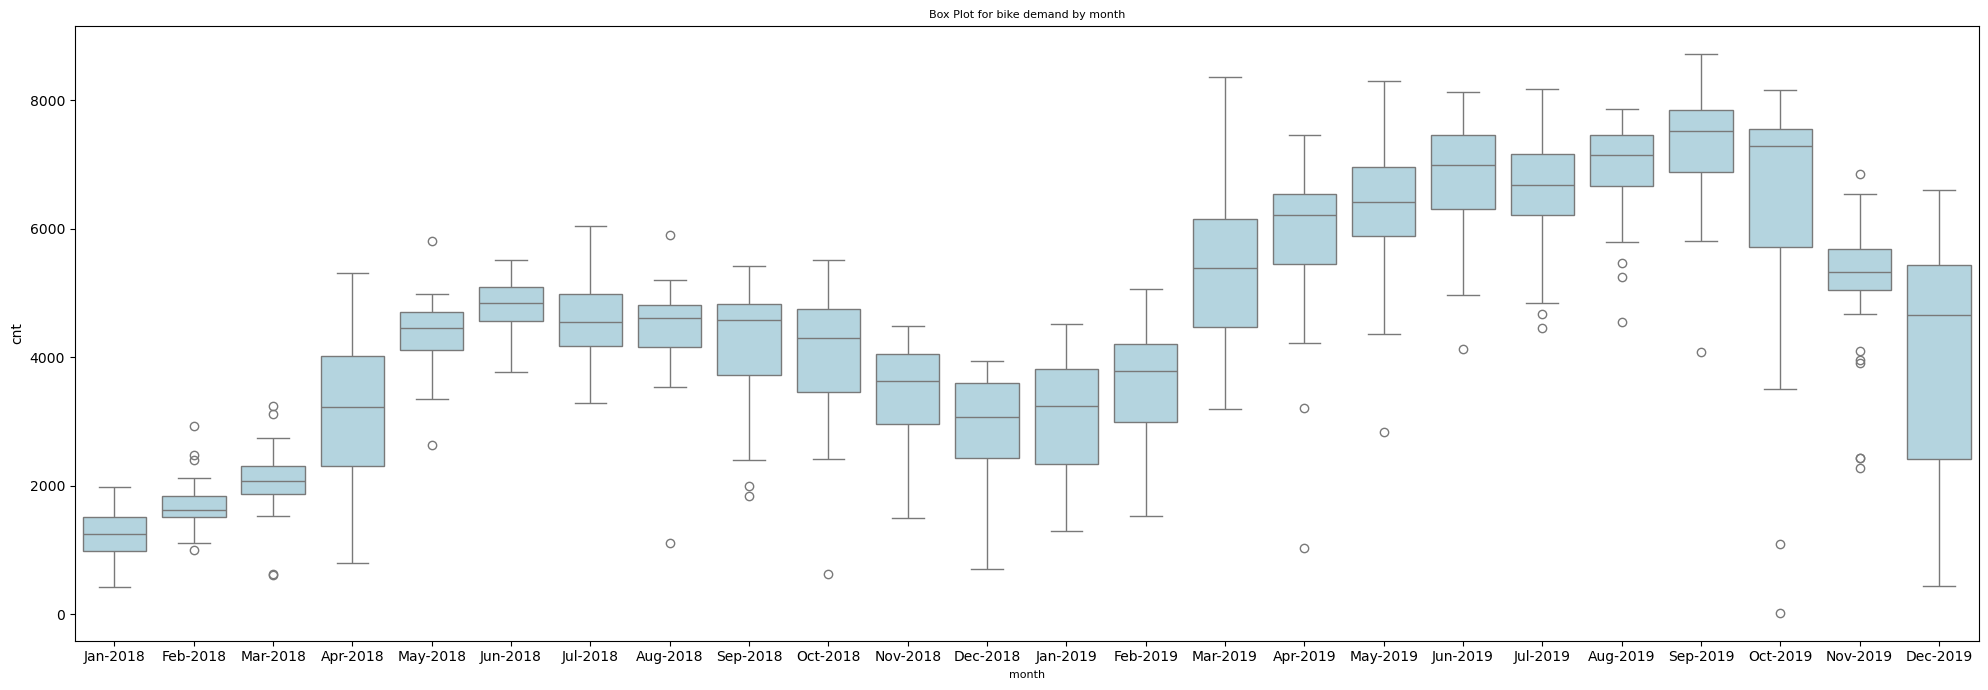

In [34]:
# month and total demand 

plt.figure(figsize=(20, 7))
sns.boxplot(x="mon_yr", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by month',fontsize=8)
plt.xlabel('month',fontsize=8)
plt.tight_layout()
plt.show()

##### We see almost a quadratic trend for Rentals by months - the Rentals increase as the year progresses, peak at June/July and then gradually decline as we approach the end of the year

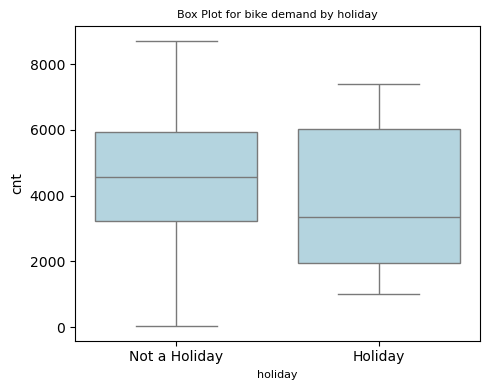

In [35]:
# holiday and total demand 

plt.figure(figsize=(5, 4))
sns.boxplot(x="holiday", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by holiday',fontsize=8)
plt.xlabel('holiday',fontsize=8)
plt.tight_layout()
plt.show()

##### On holiday we see dip in bike demand

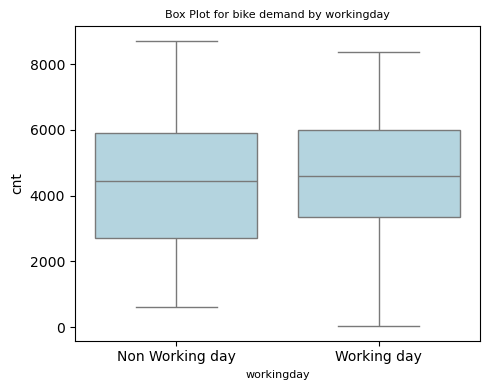

In [84]:
# workingday and total demand 

plt.figure(figsize=(5, 4))
sns.boxplot(x="workingday", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by workingday',fontsize=8)
plt.xlabel('workingday',fontsize=8)
plt.tight_layout()
plt.show()

##### On non working day we see dip in bike demand 

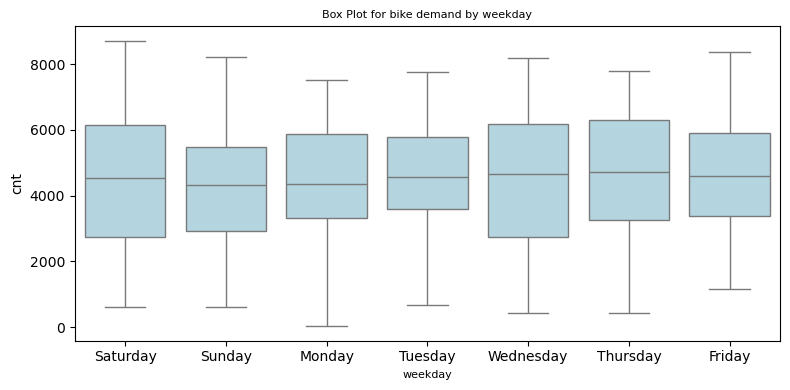

In [87]:
# weekday and total demand 

plt.figure(figsize=(8, 4))
sns.boxplot(x="weekday", y="cnt", data=bike_df, color='lightblue')
plt.title('Box Plot for bike demand by weekday',fontsize=8)
plt.xlabel('weekday',fontsize=8)
plt.tight_layout()
plt.show()

##### We see high demand on Wednesday and Thursday and Monday is lowest.

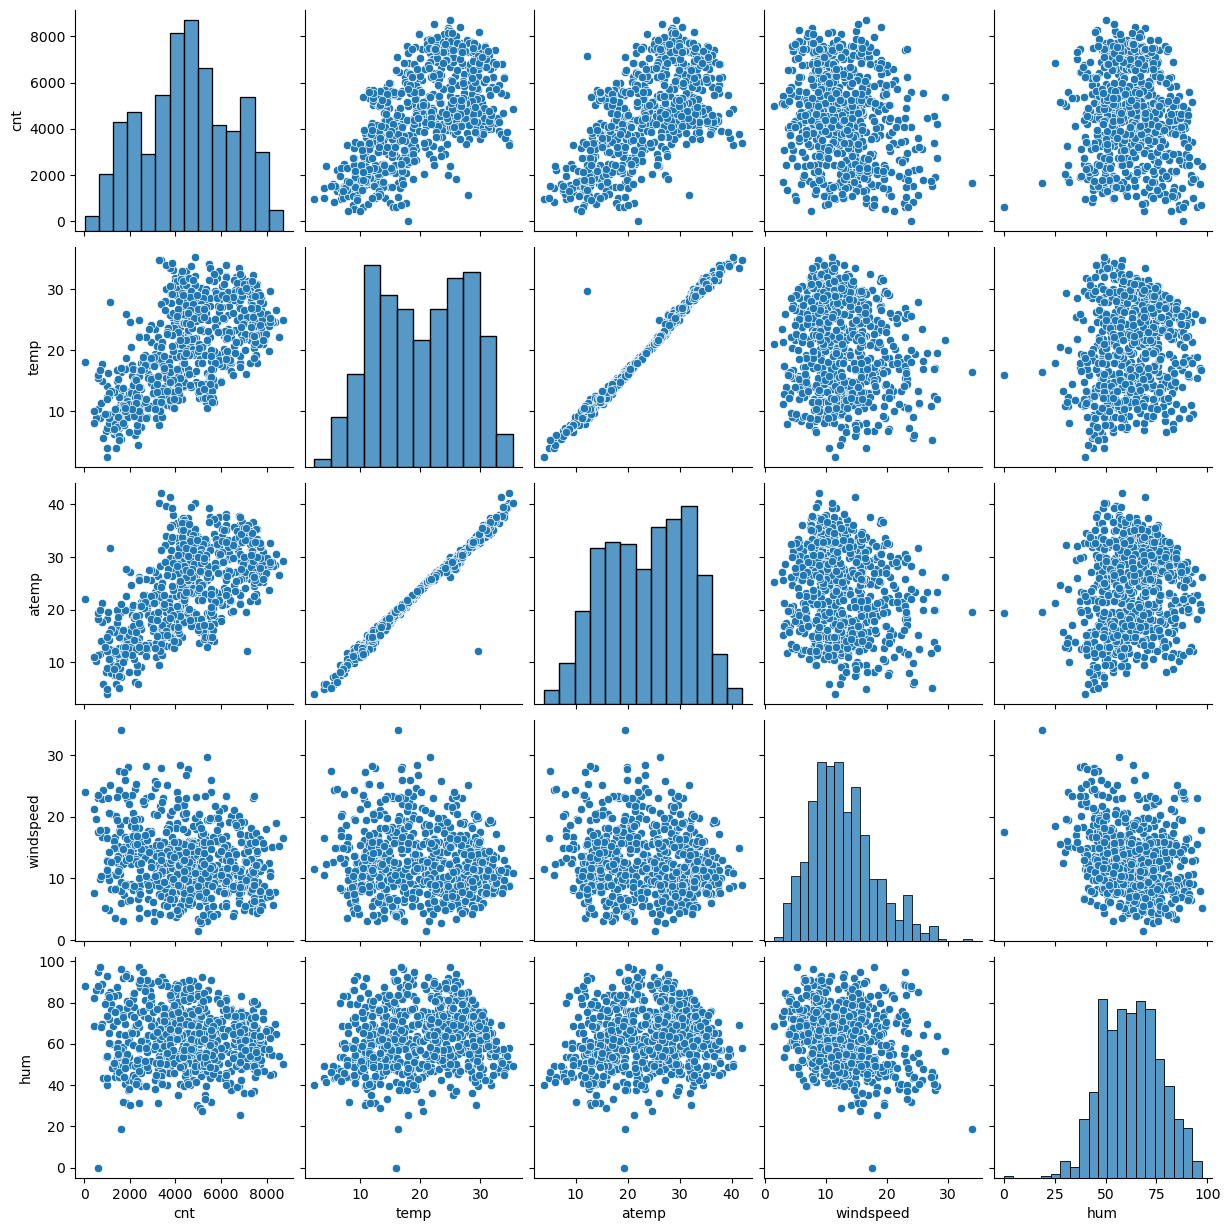

In [90]:
#Pair plot to deive additional insights
pairplot_data=bike_df[['cnt','temp','atemp','windspeed','hum']]
sns.pairplot(pairplot_data)
plt.show()

1. Bike rentals show a strong positive trend with temperature
2. temp and atemp seem to be almost a 45 degree line, suggesting a strong correlation as expected
3. No strong inferences could be drawn about Bike Rentals w.r.t. Humidity and windspeed except slight skewness by just looking at these plots, need to dive in deeper
4. Bike Rentals seem to following approximately normal distribution, let's explore further

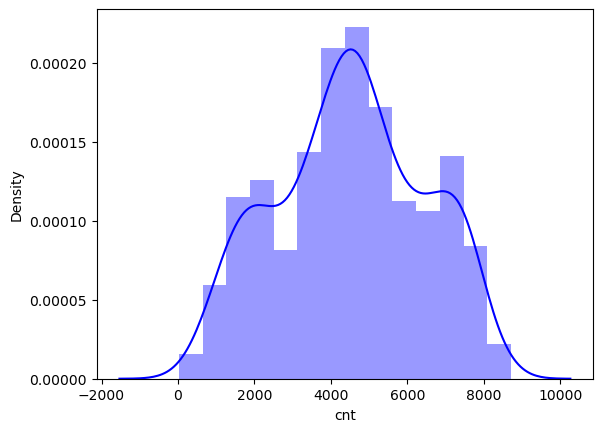

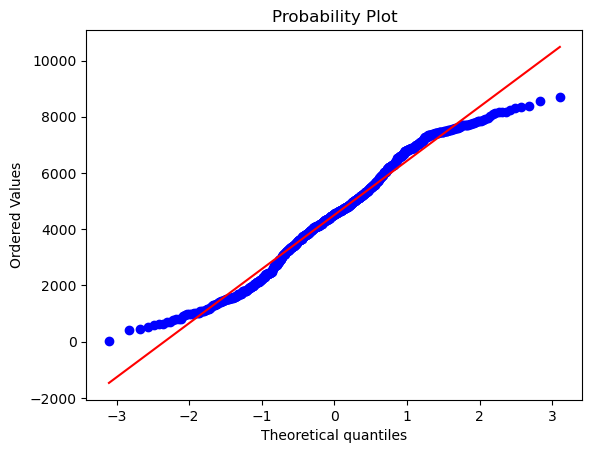

In [92]:
#Distribution and normal probability plot
sns.distplot(bike_df.cnt,kde=True, color ='blue')
plt.show()
sc.probplot(bike_df.cnt, dist="norm", plot=pylab)
pylab.show()

There is some skew in the Bike Rentals data at both ends but it seems to be approximately normally distributed

#### Transformation and dummy variable creation

In [95]:
#Create dummy variables, to avoid DUMMY VARIABLE TRAP, n-1 dummies need to be created for each variable having n distinct levels
#This method is also called One Hot encoding
dummy_variables_needed = [ 'holiday', 'weekday', 'workingday', 'weathersit', 'season', 'yr','mnth']
dummies = pd.get_dummies(bike_df[dummy_variables_needed], drop_first=True).astype(int)
dummies.head(10)

,holiday_Not a Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
#Creating the dependent & independent feature vector by merging the target, numeric independent variables with dummies
Base = pd.concat([bike_df[['cnt','temp','atemp','hum','windspeed']],dummies],axis=1)

In [97]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cnt                           730 non-null    int64  
 1   temp                          730 non-null    float64
 2   atemp                         730 non-null    float64
 3   hum                           730 non-null    float64
 4   windspeed                     730 non-null    float64
 5   holiday_Not a Holiday         730 non-null    int32  
 6   weekday_Monday                730 non-null    int32  
 7   weekday_Saturday              730 non-null    int32  
 8   weekday_Sunday                730 non-null    int32  
 9   weekday_Thursday              730 non-null    int32  
 10  weekday_Tuesday               730 non-null    int32  
 11  weekday_Wednesday             730 non-null    int32  
 12  workingday_Working day        730 non-null    int32  
 13  weath

### Train and test split

In [99]:
# We specify random_state this so that the train and test data set always have the same rows, respectively
# Not doing exact 70:30 split as it leads to loss of 1 observation (30% of 730 = 219)

In [100]:
df_train , df_test = train_test_split(Base, train_size = .69 , test_size = .31, random_state = 1234)

In [101]:
df_train.shape

(503, 30)

In [102]:
df_test.shape

(227, 30)

### Scaling the data for faster convergence

In [104]:
scaler = MinMaxScaler()
numeric_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [115]:
df_train.head(5)

,cnt,temp,atemp,hum,windspeed,holiday_Not a Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
40,0.139001,0.063544,0.068336,0.450725,0.411369,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
149,0.460447,0.846097,0.771171,0.705882,0.224366,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
95,0.298468,0.391036,0.389147,0.485186,0.496157,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
438,0.723380,0.612477,0.584842,0.597251,0.262830,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
206,0.522225,0.897030,0.806057,0.557320,0.366681,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


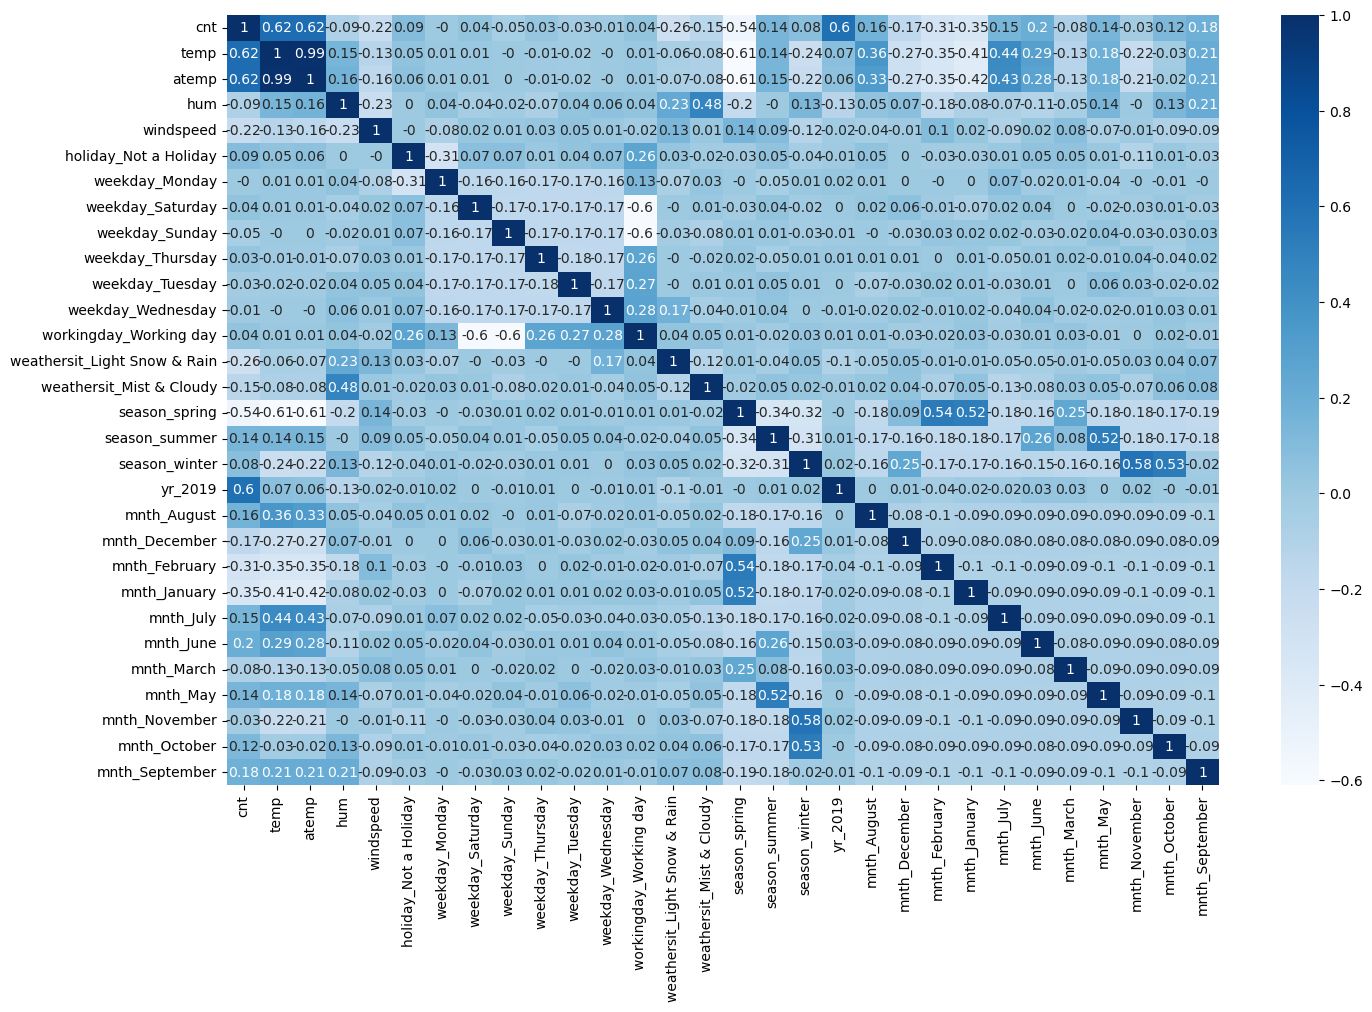

In [117]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 2), annot=True, cmap='Blues')
plt.show()

1. Temp and Atemp are highly correlated with each other and their correlation with the dependent variable is very similar which is why we can drop any of them. Since the actual temperature ("temp" column) is a more straightforward concept, we will retain it and drop atemp
2. Apart from this, we do not see many instances of strong linear relationship between predictors, we will use VIF and variable selection to take care of this further

In [119]:
df_train.shape
df_train.drop("atemp", axis = 1, inplace=True)
df_train.shape

(503, 29)

### Subsetting X and Y sets for model building

In [121]:
y_train = df_train.pop('cnt')
X_train = df_train

In [122]:
print(y_train.shape)
print('-'*50)
print(X_train.shape)


(503,)
--------------------------------------------------
(503, 28)


### Model building

28 independent variables in the model, we will start with LinearRegression function from SciKit Learn leveraging its compatibility with RFE

In [126]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [131]:
lm = LinearRegression()
rfe = RFE(estimator=lm,n_features_to_select= 15) 
rfe = rfe.fit(X_train, y_train)

In [133]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,temp,True,1
25,mnth_November,True,1
21,mnth_July,True,1
20,mnth_January,True,1
19,mnth_February,True,1
18,mnth_December,True,1
16,yr_2019,True,1
15,season_winter,True,1
12,weathersit_Mist & Cloudy,True,1
11,weathersit_Light Snow & Rain,True,1


### We have got top 15 predictors using RFE, let's try iterations to get the best possible and robust model¶

In [136]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.02e-188
Time:                        18:08:43   Log-Likelihood:                 464.86
No. Observations:                 503   AIC:                            -897.7
Df Residuals:                     487   BIC:                            -830.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2880      0.044      6.612      0.000       0.202       0.374
temp                             0.4317      0.034     12.518      0.000       0.364       0.499
hum                             -0.1775      0.041     -4.323      0.000      -0.258      -0.097
windspeed                       -0.1680      0.030     -5.578      0.000      -0.227      -0.109
holiday_Not a Holiday            0.0881      0.026      3.409      0.001       0.037       0.139
weathersit_Light Snow & Rain    -0.2501      0.030     -8.440      0.000      -0.308      -0.192
weathersit_Mist & Cloudy        -0.0530      0.012     -4.578      0.000      -0.076      -0.030
season_spring                   -0.0866      0.020     -4.347      0.000      -0.126      -0.047
season_winter                    0.1070      0.016      6.796      0.000       0.076       0.138
yr_2019                          0.2617      0.009     29.113      0.000       0.244       0.279
mnth_December                   -0.0945      0.021     -4.477      0.000      -0.136      -0.053
mnth_February                   -0.0560      0.023     -2.403      0.017      -0.102      -0.010
mnth_January                    -0.0749      0.024     -3.093      0.002      -0.122      -0.027
mnth_July                       -0.0740      0.018     -4.005      0.000      -0.110      -0.038
mnth_November                   -0.0901      0.021     -4.331      0.000      -0.131      -0.049
mnth_September                   0.0585      0.016      3.619      0.000       0.027       0.090
==============================================================================
Omnibus:                       59.154   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.384
Skew:                          -0.587   Prob(JB):                     1.81e-34
Kurtosis:                       5.456   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.02e-188
Time:                        18:08:43   Log-Likelihood:                 464.86
No. Observations:                 503   AIC:                            -897.7
Df Residuals:                     487   BIC:                            -830.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2880      0.044      6.612      0.000       0.202       0.374
temp                             0.4317      0.034     12.518      0.000       0.364       0.499
hum                             -0.1775      0.041     -4.323      0.000      -0.258      -0.097
windspeed                       -0.1680      0.030     -5.578      0.000      -0.227      -0.109
holiday_Not a Holiday            0.0881      0.026      3.409      0.001       0.037       0.139
weathersit_Light Snow & Rain    -0.2501      0.030     -8.440      0.000      -0.308      -0.192
weathersit_Mist & Cloudy        -0.0530      0.012     -4.578      0.000      -0.076      -0.030
season_spring                   -0.0866      0.020     -4.347      0.000      -0.126      -0.047
season_winter                    0.1070      0.016      6.796      0.000       0.076       0.138
yr_2019                          0.2617      0.009     29.113      0.000       0.244       0.279
mnth_December                   -0.0945      0.021     -4.477      0.000      -0.136      -0.053
mnth_February                   -0.0560      0.023     -2.403      0.017      -0.102      -0.010
mnth_January                    -0.0749      0.024     -3.093      0.002      -0.122      -0.027
mnth_July                       -0.0740      0.018     -4.005      0.000      -0.110      -0.038
mnth_November                   -0.0901      0.021     -4.331      0.000      -0.131      -0.049
mnth_September                   0.0585      0.016      3.619      0.000       0.027       0.090
==============================================================================
Omnibus:                       59.154   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.384
Skew:                          -0.587   Prob(JB):                     1.81e-34
Kurtosis:                       5.456   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Create a function to check VIF quickly as we iterate
def calc_VIF(df_name):
    adf = pd.DataFrame()
    adf['Features'] = df_name.columns
    adf['VIF'] = [variance_inflation_factor(df_name.values, i) for i in range(df_name.shape[1])]
    adf['VIF'] = round(adf['VIF'], 2)
    adf = adf.sort_values(by='VIF', ascending=False)
    adf = adf.reset_index(drop=True)
    return adf

In [142]:
calc_VIF(X_train_rfe)

,Features,VIF
0,hum,28.65
1,holiday_Not a Holiday,22.07
2,temp,18.11
3,windspeed,5.69
4,season_spring,5.08
5,season_winter,2.89
6,mnth_February,2.55
7,mnth_January,2.55
8,weathersit_Mist & Cloudy,2.36
9,yr_2019,2.17


### Given the training sample isn't huge, we can be a bit lenient with VIF values, however, let's remove the predictors one by one using the VIF table with high values¶

In [145]:
col = col.drop(['hum','holiday_Not a Holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     194.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.04e-183
Time:                        18:08:45   Log-Likelihood:                 449.67
No. Observations:                 503   AIC:                            -871.3
Df Residuals:                     489   BIC:                            -812.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2789      0.027     10.156      0.000       0.225       0.333
temp                             0.3945      0.034     11.457      0.000       0.327       0.462
windspeed                       -0.1309      0.030     -4.418      0.000      -0.189      -0.073
weathersit_Light Snow & Rain    -0.2964      0.028    -10.544      0.000      -0.352      -0.241
weathersit_Mist & Cloudy        -0.0825      0.010     -8.450      0.000      -0.102      -0.063
season_spring                   -0.0906      0.020     -4.427      0.000      -0.131      -0.050
season_winter                    0.1003      0.016      6.230      0.000       0.069       0.132
yr_2019                          0.2682      0.009     29.441      0.000       0.250       0.286
mnth_December                   -0.1062      0.022     -4.919      0.000      -0.149      -0.064
mnth_February                   -0.0587      0.024     -2.451      0.015      -0.106      -0.012
mnth_January                    -0.0813      0.025     -3.267      0.001      -0.130      -0.032
mnth_July                       -0.0647      0.019     -3.431      0.001      -0.102      -0.028
mnth_November                   -0.1021      0.021     -4.806      0.000      -0.144      -0.060
mnth_September                   0.0490      0.017      2.964      0.003       0.017       0.081
==============================================================================
Omnibus:                       73.902   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.650
Skew:                          -0.730   Prob(JB):                     3.27e-43
Kurtosis:                       5.684   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
calc_VIF(X_train_rfe)

,Features,VIF
0,temp,5.35
1,windspeed,5.00
2,season_spring,4.58
3,season_winter,2.49
4,mnth_February,2.47
5,mnth_January,2.39
6,yr_2019,2.13
7,mnth_November,1.91
8,weathersit_Mist & Cloudy,1.56
9,mnth_December,1.55


### Since mnth_July has a negative coefficient in the model whereas in EDA as well as correlation, we know that it should have a positive sign (as April is the base month for dummy creation), we need to drop this variable¶

In [150]:
col = col.drop(['mnth_July'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.33e-182
Time:                        18:08:47   Log-Likelihood:                 443.69
No. Observations:                 503   AIC:                            -861.4
Df Residuals:                     490   BIC:                            -806.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2956      0.027     10.823      0.000       0.242       0.349
temp                             0.3486      0.032     10.869      0.000       0.286       0.412
windspeed                       -0.1266      0.030     -4.231      0.000      -0.185      -0.068
weathersit_Light Snow & Rain    -0.2950      0.028    -10.380      0.000      -0.351      -0.239
weathersit_Mist & Cloudy        -0.0801      0.010     -8.139      0.000      -0.099      -0.061
season_spring                   -0.0912      0.021     -4.407      0.000      -0.132      -0.051
season_winter                    0.1025      0.016      6.302      0.000       0.071       0.134
yr_2019                          0.2706      0.009     29.455      0.000       0.253       0.289
mnth_December                   -0.1142      0.022     -5.263      0.000      -0.157      -0.072
mnth_February                   -0.0661      0.024     -2.741      0.006      -0.114      -0.019
mnth_January                    -0.0918      0.025     -3.679      0.000      -0.141      -0.043
mnth_November                   -0.1077      0.021     -5.034      0.000      -0.150      -0.066
mnth_September                   0.0600      0.016      3.658      0.000       0.028       0.092
==============================================================================
Omnibus:                       80.812   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.700
Skew:                          -0.799   Prob(JB):                     1.07e-46
Kurtosis:                       5.747   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
calc_VIF(X_train_rfe)

,Features,VIF
0,windspeed,4.90
1,season_spring,4.57
2,temp,4.18
3,mnth_February,2.47
4,season_winter,2.45
5,mnth_January,2.38
6,yr_2019,2.11
7,mnth_November,1.91
8,weathersit_Mist & Cloudy,1.54
9,mnth_December,1.54


### Interpretation of the model & checks done so far
1. Each of the variable coefficients signify the expected change in Bike Rentals given a unit change in the respective variable, keeping all the other variables constant
2. Looking at the R squared value, we can say that the selected variables explain ~83% of the variation in bike rentals. The adjusted R Squared on the training set is close to R Squared ~83%, this means - despite penalizing for additional variables, the R squared doesn't dip much
3. All the variables in the above model are significant at 98% level, which means we have statistically proven that the coefficient of all the above variables are not zero making them highly significant
4. The F-statistic is siginificant too, which means we reject the null hypothesis that all the variables are 0 at the same time, making the overall model significant
5. We have kept only those variables in the model where the sign of coefficient is in sync with our observations during EDA / Correlation analysis. Hence, the model's directional relationships do not contradict the business observations
6. The VIF values of all the final variables in the current model are below 5, suggesting we do not have the problem of multicollinearity
7. The AIC BIC values are fairly low

### Variables in the final model - drivers of Bike Rentals demand

1. Higher Temperature and Working day has a positive impact on bike rentals where as an increase in windspeed leads to reduced demand statistically
2. Summer and winter seasons (against fall) have a positive relation with the bike rentals too - implying higher demand. However, the spring season implies lower demand compared to Fall
3. Year 2019 saw an increase in the demand possibly due to increasing popularity/visibility
4. As against April, the month of September shows a positive demand seasonality while the month of January sees a cyclically lower seasonal demand
5. The adverse weather conditions of Light Rain and thunderstorms as well as Mist/Cloudy leads to less people opting for bike rentals

### Linear Regression assumptions

#### Normally Distributed Error Terms

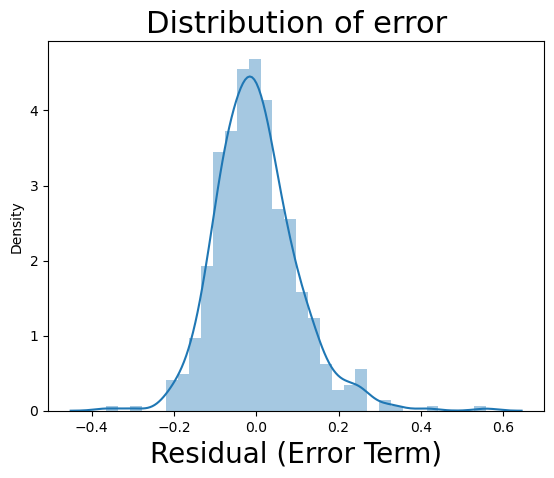

In [94]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Distribution of error', fontdict={'fontsize': 22})
plt.show()

The residuals seem approximately normally distributed which implies that the assumption of normally distributed error holds true!

#### Independence of error term

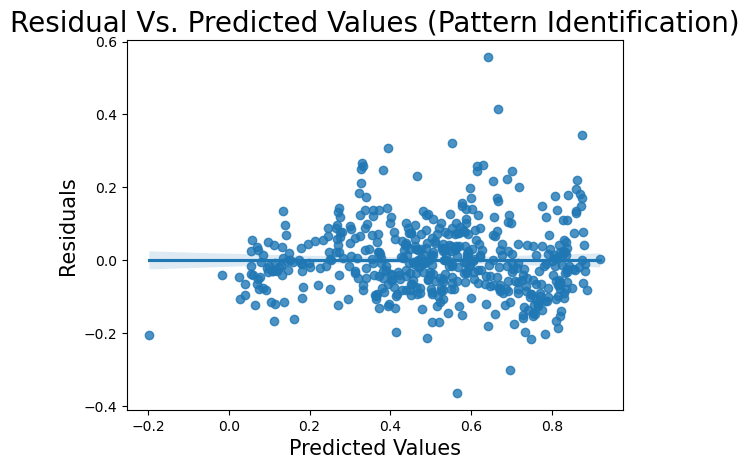

In [97]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Identification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [98]:
#PearsonR
print("Pearson Value for Predicted Against Residuals ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Against Residuals ==> 3.101685575046531e-15


No specific pattern identified in the plot above, another assumption validates

#### No Heteroscedasticity

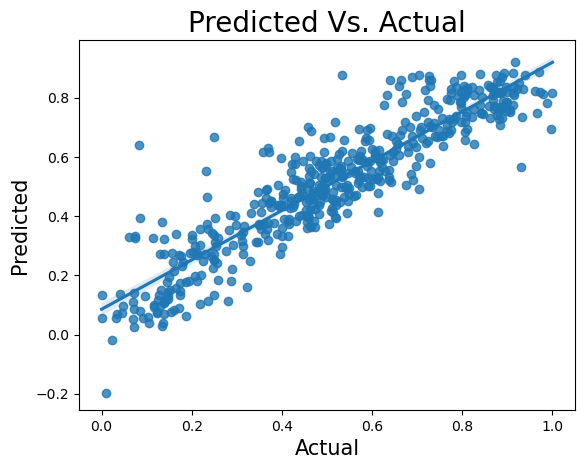

In [101]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual', fontdict={'fontsize': 20})
plt.xlabel('Actual', fontdict={'fontsize': 15})
plt.ylabel('Predicted', fontdict={'fontsize': 15})
plt.show()

The scatter plot shows an evenly distributed pattern, hence the assumption of Homoscedasticity holds!

#### Multicollinearity check

In [104]:
calc_VIF(X_train_rfe)

,Features,VIF
0,windspeed,4.90
1,season_spring,4.57
2,temp,4.18
3,mnth_February,2.47
4,season_winter,2.45
5,mnth_January,2.38
6,yr_2019,2.11
7,mnth_November,1.91
8,weathersit_Mist & Cloudy,1.54
9,mnth_December,1.54


We've already tested that the VIF values are fairly below 5, implying no variance inflation ruling out the issue of multicollinearity, thereby validating yet another assumption of Ordinary Least squares...!

### Prediction on Test sample

Need to do variable scaling before scoring

In [108]:
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,cnt,temp,atemp,hum,windspeed,holiday_Not a Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,season_spring,season_summer,season_winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
21,0.069061,-0.049680,-0.026641,0.412194,0.308364,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
321,0.371798,0.236028,0.234324,0.422499,0.301278,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
277,0.551858,0.587011,0.577178,0.667669,0.319249,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
523,0.917253,0.734271,0.672486,0.482181,0.315400,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
131,0.556630,0.582583,0.572091,0.770287,0.344847,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [109]:
#Fix the test target variable
y_test = df_test.pop('cnt')

In [110]:
#Filter the test input feature vector to keep only the required variables and add constant

X_test = df_test
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [111]:
#Scoring

y_pred = lr_model.predict(X_test_new)

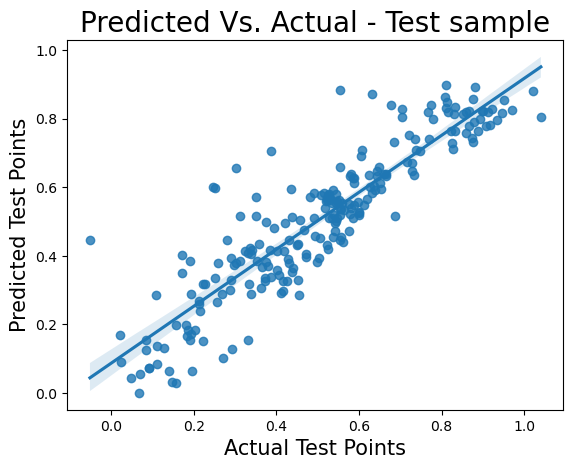

In [112]:
#Predicted v/s Actuals for Test sample

corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Vs. Actual - Test sample', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Actual v/s Predicted seem alright in test sample too !

In [114]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.8097404468094285

In [115]:
# Adj. R-Squared for test sample
r2_test=r2_score(y_test, y_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))
N= len(X_test_new)         
p =len(X_train_rfe.columns)     
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

R-Squared for Test dataset:  0.81
Adj. R-Squared for Test dataset:  0.799


#### The RSquared for Test is close to train and actual v/s predicted are similar for both test and train samples implying that the model is robust and doesn't overfit. At the same time, the assumptions of OLS for Linear regression in order for the coefficients to be BLUE (Best Linear Unbiased Estimate) are validated too...!

In [117]:
# Mean Sqare Error for test sample
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0106


##### The MSE is failrly low and is less than 1.5%